In [1]:
import pandas
pandas.__version__

'1.4.4'

In [47]:
import pandas as pd


# Dear Dr. Anne, welcome to my first assignment!

# You will find the describing and analyzing comments of my assignments right here next to the Python code
# I hope in this way it's most easy and efficient to understand my thought processes

# Kind regards,
# Julian Buerkle
# Matr. Nr.: 798628

In [3]:
import os
os.path.abspath("")

'C:\\Users\\jbuer\\PPOD'

In [4]:
df = pd.read_csv('Student Mental Health.csv')

In [5]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [6]:
# looking at data
# df.tail()
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [7]:
# 3.1 Pseudonymisation – 10 marks
# As a frst task, let’s consider how to pseudonymise data. Your goal in this task would
# be to 

#1.) Study your dataset to determine which attributes qualify as explicit personally
# 1identifable information. Explain why you decided on the attributes and show what method
# was used to identify the attributes (or depending on the dataset, the attribute values); 

#(2.) Using a tool such anonymizedf which builds on pandas and faker generate pseudonymous
# values to replace the original values.



# I chose the following dataset: 
# A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA dataset: https://www.kaggle.com/datasets/shariful07/student-mental-health/
# This Data set was collected by a survey conducted by Google forms from University student in order to examine their current academic situation and mental health.

# 1. Attributes that classify as explicit personally identifiable information 
# --> In this dataset no single attribute can be used to personally identify a study participant. However, we have quasi-identifiers (A combination of Age, Gender, the course, the marital status and the year of study)
# which could be used to do so. F.ex. a person at that knows the data collector of this study "MD Shariful Islam" as can be seen on Kaggle.com, could know which school he went to or at what instituion,
# he likely had done this research. Combining e.g. age, the course name and the marital status (assuming that a "Yes" stands for married), he could identfity that the 22yo married female studiyng law in year 3, is a person he knows,
# let's call her "Sarah". He could derive that Sarah suffered from Depression in 2020 and maybe even now. Or a school official could deduct that a high number of Law students have depression
# and could fire the law teacher (Or improve the classes workload)

# 2. Not really needed at this stage as no explicit PII are present. However, the Course name could be pseudomyzed to reduce the potential of the quasi identifier.
import random
import string


# create new strings for all unique values in the column
    
def replace_unique_with_random_inplace(df, column_name):
    # Get the unique values in the specified column
    unique_values = df[column_name].unique()
    
    # Generate a random letter sequence of the same length as the unique values
    random_sequences = [''.join(random.choices(string.ascii_letters, k=len(val))) for val in unique_values]
    
    # Create a dictionary mapping unique values to random sequences
    replacement_dict = dict(zip(unique_values, random_sequences))
    
    # Replace values in the specified column in place using the dictionary
    df[column_name].replace(replacement_dict, inplace=True)
    
    return replacement_dict

# call function for any column, where it could make sense
# In this case it makes most sense for the 'What is your course?' column
replacement_dict = replace_unique_with_random_inplace(df, 'What is your course?')


# see result
df.head()
# dictionary to track the changes made
#print(replacement_dict)

 

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,YfUDShtjQDU,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,xhPnynXIwiNXfKRFV,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,tuL,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,BBaE,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,ODWDwJpGfNzV,year 4,3.00 - 3.49,No,No,No,No,No


In [9]:
#3.2 Randomisation – 10 marks
# Randomisation, is helpful in supporting pseudonymisation by increasing the variability of the
# data. For example instead of replacing a name with another name, randomisation might use
# a randomly generated string of characters. 

# Your goal in this task is to use the randomisation
# technique to generate random strings (that do not necessarily have a meaning) and then to
# modify the randomisation process to generate random but meaningful replacements. For
# example instead of replacing “Anne” with “xyzk” we might replace instead with “Amy”.
# Python’s built-in random library used with pandas might be helpful in generating random
# replacement values. 

# new dataframe to make changes to the initial values of the course column (df was already changed in task 1)
df1 = pd.read_csv('Student Mental Health.csv')

def replace_unique_with_random_inplace_first_last_letter(df, column_name):
    # Get the unique values in the specified column
    unique_values = df[column_name].unique()
    
    # As we have subject names here. I think meaningful replacements could be a randomisation which keeps the first and last letter of a value and adds randomized letters in the middle
    random_sequences = [
        val[0] + ''.join(random.choices(string.ascii_letters, k=len(val)-2)) + val[-1]
        for val in unique_values
    ]
    
    # Create a dictionary mapping unique values to random sequences
    replacement_dict = dict(zip(unique_values, random_sequences))
    
    # Replace values in the specified column in place using the dictionary
    df[column_name].replace(replacement_dict, inplace=True)
    
    return replacement_dict

replacement_dict = replace_unique_with_random_inplace_first_last_letter(df1, 'What is your course?')


# see result
df1.head()

# dictionary to track the changes made
#print(replacement_dict)





,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,EaNdILFttqg,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,IyuwJOfCFVWFPJZDn,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BqT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Ltps,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,MWPRhPNCUnis,year 4,3.00 - 3.49,No,No,No,No,No


In [26]:
#Finally, create a lookup table to keep track of your changes. This is
#useful approach to adopt, especially for being able to determine the wider impact of your
#changes on the data

# add an 'ID' column with unique identifiers
df0 = pd.read_csv('Student Mental Health.csv')
df0['ID'] = range(1, len(df) + 1)
df1['ID'] = range(1, len(df) + 1)

#df1.tail()

# create lookup table with the old values
df_oldvalues = pd.DataFrame(df0)

# Add a prefix to all column names except 'ID'
df_oldvalues.columns = ['OV_' + col if col != 'ID' else col for col in df_oldvalues.columns]


# Merge the original DataFrame with the changes DataFrame based on the ID column
merged_df = pd.merge(df1, df_oldvalues, on='ID', how='left')
#df_oldvalues.head()
merged_df.head()

# the df_oldvalues can be merged at any stage to the updated df1 dataframe to check for changes that have been made. The prefix OV_ was dded to all the columns of the original dataframe
# so that confusion is erased


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,...,OV_Choose your gender,OV_Age,OV_What is your course?,OV_Your current year of Study,OV_What is your CGPA?,OV_Marital status,OV_Do you have Depression?,OV_Do you have Anxiety?,OV_Do you have Panic attack?,OV_Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,"[18, 20)",EaNdILFttqg,year 1,3.00 - 3.49,No,Yes,No,Yes,...,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,"[20, 22)",IyuwJOfCFVWFPJZDn,year 2,3.00 - 3.49,No,No,Yes,No,...,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,"[18, 20)",BqT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,...,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,"[22, 24)",Ltps,year 3,3.00 - 3.49,Yes,Yes,No,No,...,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,"[22, 24)",MWPRhPNCUnis,year 4,3.00 - 3.49,No,No,No,No,...,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [23]:
# 3.3 Aggregation – 10 marks

# For certain attribute values, such as salary and/or age, combining data to create an aggregated view of the data, so that the data is represented in ranges instead of individually.
# For example, instead of Age = 35, 23, 20 we could use instead Age = [20 - 35]. Building
# on your results from the previous tasks, study the data to determine which attributes (and
# correspondingly attribute values) qualify for aggregation. 


# --> it make sense to aggregate the Age column.


# Define a replacement algorithm
# to aggregate data, throughout your selected dataset. In Python, the pandas.cut() method
# might be helpful, but you can also achieve this by other techniques such as groupby()

# all the participants are students and thus are very young (mean: 20,35 years, min 18, max 24), so I chose to group the age only by 3 years together, with another dataset 5 or 10 years would make more sense
def replace_column_with_groups(df, column_name, bin_size=2):
    # Create age bins using pd.cut
    df[column_name] = pd.cut(df[column_name], bins=range(int(df[column_name].min()), int(df[column_name].max()) + bin_size, bin_size), right=False)

    return df

df1 = replace_column_with_groups(df1, 'Age', bin_size=2)
#print(df2)

df1.head()


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,ID
0,8/7/2020 12:02,Female,"[18, 20)",EaNdILFttqg,year 1,3.00 - 3.49,No,Yes,No,Yes,No,1
1,8/7/2020 12:04,Male,"[20, 22)",IyuwJOfCFVWFPJZDn,year 2,3.00 - 3.49,No,No,Yes,No,No,2
2,8/7/2020 12:05,Male,"[18, 20)",BqT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,3
3,8/7/2020 12:06,Female,"[22, 24)",Ltps,year 3,3.00 - 3.49,Yes,Yes,No,No,No,4
4,8/7/2020 12:13,Male,"[22, 24)",MWPRhPNCUnis,year 4,3.00 - 3.49,No,No,No,No,No,5


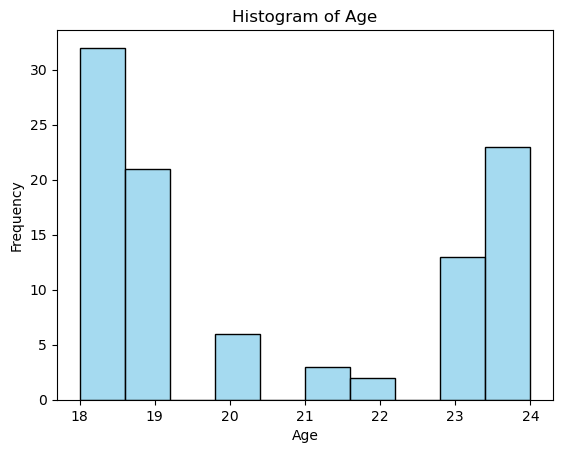

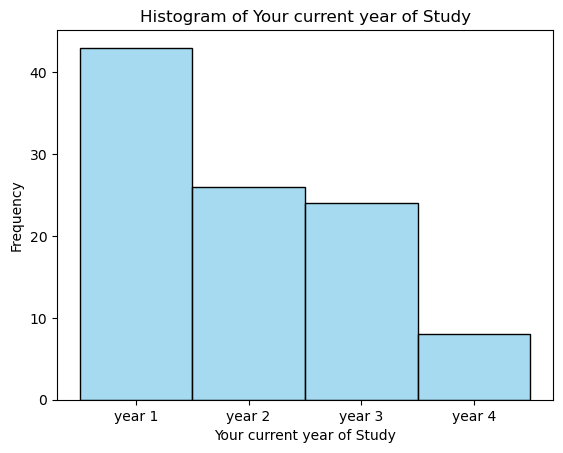

In [77]:
# 3.4 Perturbation – 10 marks

# One of the techniques used to anonymise data is to distort the data by adding noise to
# make it harder to re-identify individuals within the dataset. For example, a person’s age
# or postcode might be modifed slightly to make it harder to tell their age or exact location.
# Perturbation, typically works well with numerical and/or categorical values. Other well
# known mechanisms that employ noise additions include Diﬀerential Privacy.

# In this task, your goal is to design and code a function to add noise to one (1) or two
# (2) selected attributes of your choice. The amount of noise you add can be determined by
# metrics such as standard deviation, variance, and mean. Your goal is to preserve the original
# distribution of values while at the same time distorting the values to minimise disclosure
# risks.

# You must analyse your original data to establish what the distribution is, and the repeat
# the process once you have applied the noise addition function to the data.


# new dataframe to make change the initial values of the course column (e.g. for df1 Age was already changed and aggregated)
df3 = pd.read_csv('Student Mental Health.csv')
df5 = pd.read_csv('Student Mental Health.csv')

# understand distribution
import seaborn as sns
import matplotlib.pyplot as plt

column_to_plot = 'Age'
column_to_plot1 = 'Your current year of Study'


# Plotting a histogram using seaborn
sns.histplot(df3[column_to_plot], bins=10, kde=False, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_to_plot}')
plt.show()


# harmonizing data in year column
df3[column_to_plot1] = df3[column_to_plot1].str.lower()

# Plotting a histogram using seaborn
sns.histplot(df3[column_to_plot1], bins=10, kde=False, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel(column_to_plot1)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_to_plot1}')
plt.show()

# it makes sense to distort the age and the year, as they are number values which can be perturbated and through the perturbation privacy is improved. Original distribution is preserved using NumPy function
test = df3['Age'].unique().tolist()
#print(test)



# distribution of age appear to be bimodal
# distribution of year column appears to be non-symmetric (right skewed)


In [78]:
import numpy as np


def perturb_age(df, mean=0, std_dev=1, min_value=18):
    # Extract the specified column
    column_to_perturb = df['Age']
    
    # Perturb the column with random noise and rounding up
    perturbed_column = round(column_to_perturb + np.random.normal(mean, std_dev, len(column_to_perturb)))
    
    # Ensure that perturbed values are not below the specified minimum
    perturbed_column = np.maximum(perturbed_column, min_value)
    
    # Replace the original column with the perturbed values
    df['Age'] = perturbed_column

    
    
# modify year column:

def remove_first_four_chars(data, column_name, n=4):
    # Use the str accessor to apply string slicing to each value in the column
    data[column_name] = data[column_name].str[n:]

# Choose the column name to remove characters

# Remove the first 4 characters from each value in the chosen column
remove_first_four_chars(df3, 'Your current year of Study')
    
def perturb_year(df, mean=0, std_dev=1, min_value=1):
    # Extract the specified column
    column_to_perturb = df['Your current year of Study']
    column_to_perturb = column_to_perturb.astype(int)
       
    # Perturb the column with random noise and rounding up
    perturbed_column = round(column_to_perturb + np.random.normal(mean, std_dev, len(column_to_perturb)))
    
    # Ensure that perturbed values are not below the specified minimum
    perturbed_column = np.maximum(perturbed_column, min_value)
    
    # Replace the original column with the perturbed values
    df['Your current year of Study'] = perturbed_column

# Perturb the chosen columns. The standard deviation is adjusted to not loose the orginal distribution
perturb_age(df3, std_dev=0.6)
perturb_year(df3, std_dev=0.6)
df3.head()


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,1.0,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,20.0,Islamic education,2.0,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1.0,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3.0,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,24.0,Mathemathics,3.0,3.00 - 3.49,No,No,No,No,No


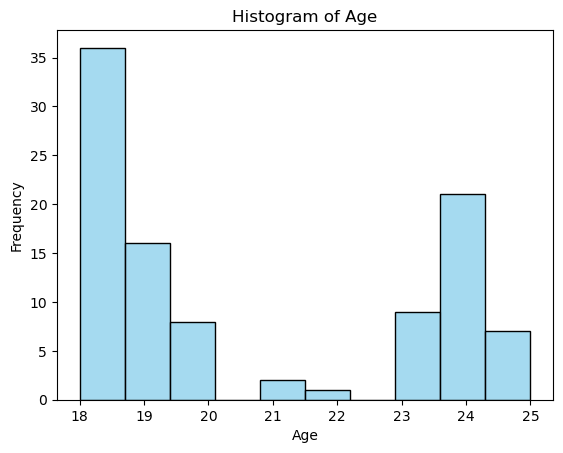

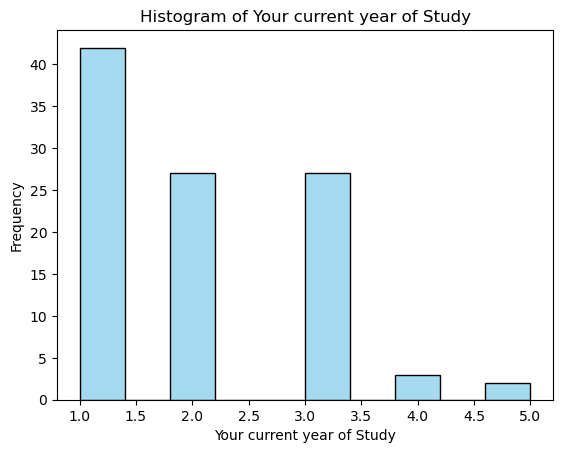

In [79]:
# understand distribution after perturbation
import seaborn as sns
import matplotlib.pyplot as plt

column_to_plot = 'Age'
column_to_plot1 = 'Your current year of Study'


# Plotting a histogram using seaborn
sns.histplot(df3[column_to_plot], bins=10, kde=False, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_to_plot}')
plt.show()


# Plotting a histogram using seaborn
sns.histplot(df3[column_to_plot1], bins=10, kde=False, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel(column_to_plot1)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_to_plot1}')
plt.show()

# distribution of age and year column have stayed the same


In [81]:
# 3.5 Data Analysis – 10 marks
# Analyse your data to determine the level of information loss. In this case, you will design a
# function to analyse information loss and discuss its pros and cons relative to your dataset

# tracking the changes of df3 (age & Year of study are perturbed)
df3['ID'] = range(1, len(df) + 1)
merged_df3_df = pd.merge(df3, df_oldvalues, on='ID', how='left')
#df_oldvalues.head()
merged_df3_df.head()

# tracking the changes of df1 (age is aggregated, Course column randomized)
#merged_df1_df = pd.merge(df1, df_oldvalues, on='ID', how='left')
#df_oldvalues.head()
#merged_df1_df.head()

#In this assignment I changed the values of the columns Age, What is your course and current year of study, as they in combination are quasi-identifiers.
# The course names were randomised. As the first and last letter remain the same, the information loss for me as the researcher is low. 
# Especially because I kept track of the changes using a dictionary which showed the random changes made by the randomisation function and the lookp table. 
# For other researcher with both tools there is not data loss

# The age column I changed for two separate dateframes. One time it was aggregated (df1) one time it was perturbed (df3). 
# Actually the order in reality should be changed so that first the perturbation and then the aggregatetn takes place. Imagine we would have done that
# then the data loss can be considered middle in my opinion. Through the perturbation privacy concerns are lowered, but the actual age is changed which means
# that, considering that the new research do not know about them, certain research results could be deducted falsely. E.g. they could find out that depression is high in males above 25 that study law.
# The results can be misleading, as the actual depression actually could occur when the participants are younger and might not have the skills to handle so much stress. 
# So in this scenario rather the syllabus of the first years could be changed not of the last years where people are older. If the researcher have access to the dictionary and the
# lookup column the data loss is not existent

# In both columns the perturbation effects are rather low, as I had to adjust the standard deviation in order not to lose the originl distribution. So the effect for data loss is low even when
# research have no access to dictionary or lookup table. In this way also the gained benefit in privacy is not as high, yet as can be seen in the lookup column. Often time they are pretty similar.
# Right now I don#t know how to change this, but excited to learn what can be done about that in the future classes!

# For the year of study column it is the same as with age. Through perturbation research could come to worng conclusions with the updated data set




,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,...,OV_Choose your gender,OV_Age,OV_What is your course?,OV_Your current year of Study,OV_What is your CGPA?,OV_Marital status,OV_Do you have Depression?,OV_Do you have Anxiety?,OV_Do you have Panic attack?,OV_Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,1.0,3.00 - 3.49,No,Yes,No,Yes,...,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,20.0,Islamic education,2.0,3.00 - 3.49,No,No,Yes,No,...,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1.0,3.00 - 3.49,No,Yes,Yes,Yes,...,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3.0,3.00 - 3.49,Yes,Yes,No,No,...,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,24.0,Mathemathics,3.0,3.00 - 3.49,No,No,No,No,...,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
# 4 Submissions
# Once you have completed your assignment, please submit a 2-3 page report analysing your
# results. Code can be uploaded to Github or Gitlab and a link shared. Please note that
# you should aim to keep the same repository for all fve (5) assignments. Your report should
# contain enough details to ensure that your procedure is repeatable for grading purposes

# Dear Dr. Anne, please find my analysis in the comments directly next to the code. I believe in this way understanding my thought processes is most efficient.
# Please let me know whether this style of submitting the report is fine for the other assignments as well or if I should adapt it
